<a href="https://colab.research.google.com/github/taimoorsardar/Machine-Learning-Projects/blob/main/SpamClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

#Dataset
remember to upload dataset to colab directory or file system

In [ ]:
# Load the dataset
file_path = '/content/email.csv'
emails_df = pd.read_csv(file_path)

#Data Cleaning and Preprocessing

In [ ]:
# Check for missing values
missing_values = emails_df.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

Missing values in each column:
Category    0
Message     0
dtype: int64


In [ ]:
# Drop rows with missing values
emails_df.dropna(inplace=True)

In [ ]:
# Check for duplicate entries
duplicate_entries = emails_df.duplicated().sum()
print(f"Number of duplicate entries: {duplicate_entries}")

Number of duplicate entries: 415


In [ ]:
# Drop duplicate entries
emails_df.drop_duplicates(inplace=True)

In [ ]:
# Display the unique values in the 'Category' column
print(emails_df['Category'].unique())

['ham' 'spam' '{"mode":"full"']


In [ ]:
# Keep only rows where the 'Category' is 'ham' or 'spam'
emails_df = emails_df[emails_df['Category'].isin(['ham', 'spam'])]

In [ ]:
# Display the unique values in the 'Category' column
print(emails_df['Category'].unique())

['ham' 'spam']


In [ ]:
# Convert text to lowercase
emails_df['Message'] = emails_df['Message'].str.lower()

# Remove punctuation and special characters
emails_df['Message'] = emails_df['Message'].str.replace(f"[{string.punctuation}]", " ", regex=True)

In [ ]:
# Display the cleaned data
emails_df.head()

,Category,Message
0,ham,go until jurong point crazy available only ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives aro...


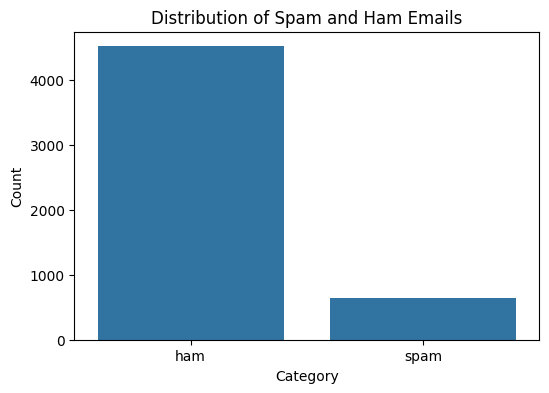

In [ ]:
# Plot the distribution of spam and ham emails
plt.figure(figsize=(6, 4))
sns.countplot(data=emails_df, x='Category')
plt.title('Distribution of Spam and Ham Emails')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


#Feature Extraction

In [ ]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the data
X = tfidf.fit_transform(emails_df['Message'])

# Get target labels
y = emails_df['Category']

In [ ]:
# Display shape of the features and labels
X.shape, y.shape

((5157, 5000), (5157,))

#Model Selection and Training

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Initialize and train SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

#Model Evaluation and Fine Tuning

In [ ]:
# Make predictions
nb_predictions = nb_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)

In [ ]:
# Evaluate Naive Bayes model
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions, pos_label='spam')
nb_recall = recall_score(y_test, nb_predictions, pos_label='spam')
nb_f1 = f1_score(y_test, nb_predictions, pos_label='spam')

In [ ]:
# Evaluate SVM model
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, pos_label='spam')
svm_recall = recall_score(y_test, svm_predictions, pos_label='spam')
svm_f1 = f1_score(y_test, svm_predictions, pos_label='spam')

In [ ]:
# Display evaluation metrics
{
    'Naive Bayes': {
        'Accuracy': nb_accuracy,
        'Precision': nb_precision,
        'Recall': nb_recall,
        'F1 Score': nb_f1
    },
    'SVM': {
        'Accuracy': svm_accuracy,
        'Precision': svm_precision,
        'Recall': svm_recall,
        'F1 Score': svm_f1
    }
}

{'Naive Bayes': {'Accuracy': 0.9786821705426356,
  'Precision': 1.0,
  'Recall': 0.8382352941176471,
  'F1 Score': 0.9119999999999999},
 'SVM': {'Accuracy': 0.9777131782945736,
  'Precision': 0.9829059829059829,
  'Recall': 0.8455882352941176,
  'F1 Score': 0.9090909090909091}}

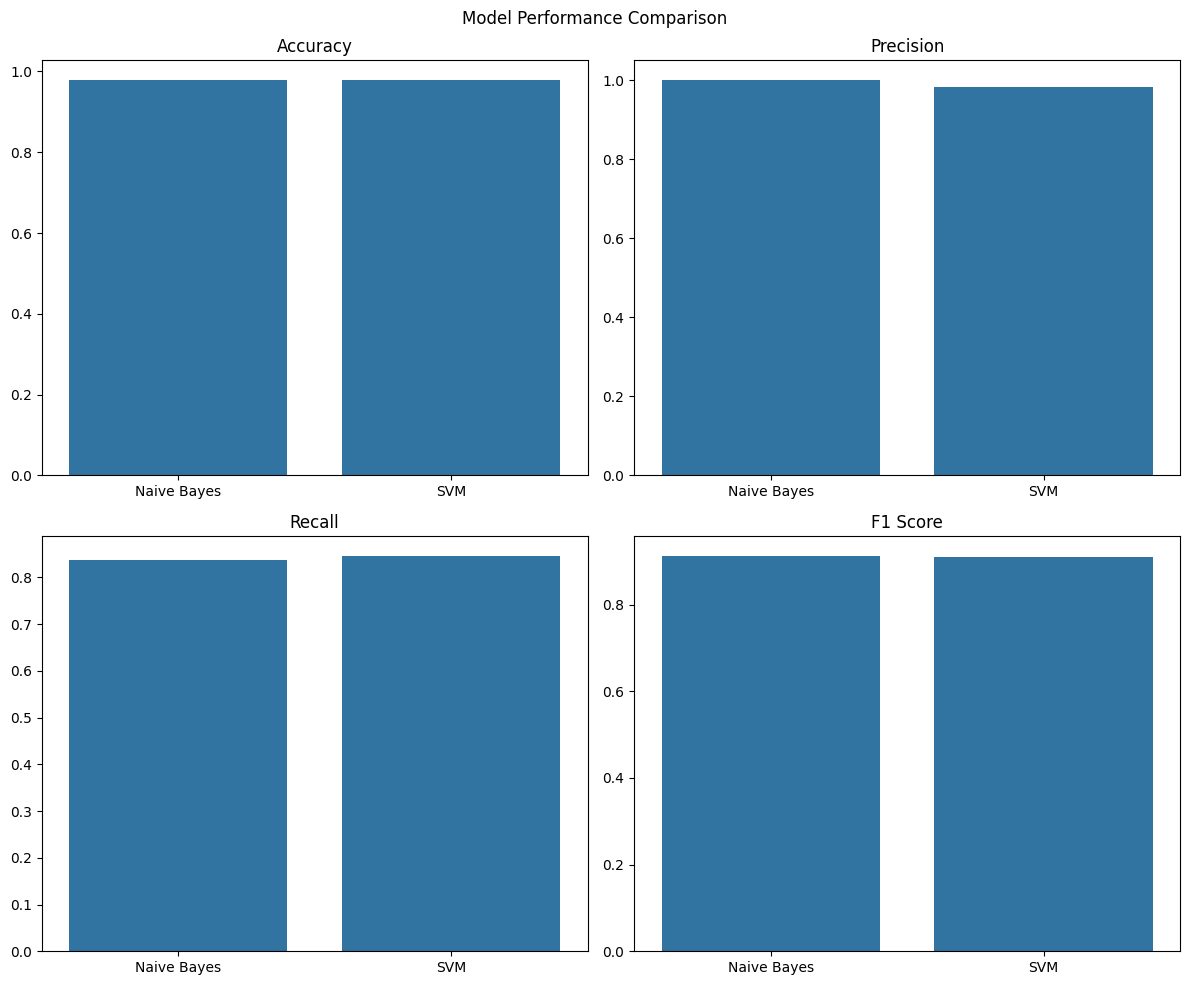

In [ ]:
# Data for visualization
models = ['Naive Bayes', 'SVM']
accuracy = [nb_accuracy, svm_accuracy]
precision = [nb_precision, svm_precision]
recall = [nb_recall, svm_recall]
f1_score = [nb_f1, svm_f1]

# Plot the performance metrics
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Model Performance Comparison')

# Accuracy
sns.barplot(ax=axes[0, 0], x=models, y=accuracy)
axes[0, 0].set_title('Accuracy')

# Precision
sns.barplot(ax=axes[0, 1], x=models, y=precision)
axes[0, 1].set_title('Precision')

# Recall
sns.barplot(ax=axes[1, 0], x=models, y=recall)
axes[1, 0].set_title('Recall')

# F1 Score
sns.barplot(ax=axes[1, 1], x=models, y=f1_score)
axes[1, 1].set_title('F1 Score')

# Adjust layout
plt.tight_layout()
plt.show()


After analysing the results we see that both of the models are very comparable to each other.
Based on the prefereable metric the model can be chose.
For example, if accuracy is preferred NB outperforms SVM, but if Recall is preferred then SVM is preferred
However NB outperforms svm in most metrics

#THE END